In [ ]:
## Time series_forecasting (tsfresh)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import roll_time_series, make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute

try:
    import pandas_datareader.data as web
except ImportError:
    print("You need to install the pandas_datareader. Run pip install pandas_datareader.")

from sklearn.linear_model import LinearRegression

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

print("Setup Complete")

C:\Users\i0204390\AppData\Local\Temp\ipykernel_14844\4225069866.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Setup Complete


In [2]:
df = web.DataReader("AAPL", 'stooq')["High"]
df.head()

Date
2022-06-06    148.5689
2022-06-03    147.9700
2022-06-02    151.2700
2022-06-01    151.7400
2022-05-31    150.6600
Name: High, dtype: float64

In [3]:
df.shape

(1258,)

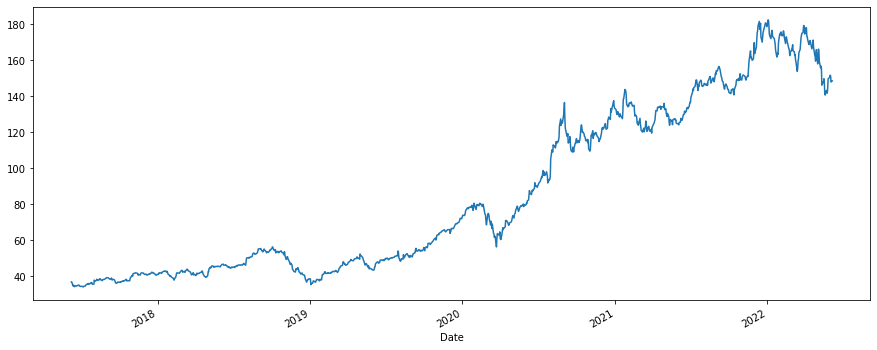

In [4]:
plt.figure(figsize=(15, 6))
df.plot(ax=plt.gca())
plt.show()

In [5]:
df_melted = pd.DataFrame({"high": df.copy()})
df_melted["date"] = df_melted.index
df_melted["Symbols"] = "AAPL"

df_melted.head()

,high,date,Symbols
Date,,,
2022-06-06,148.5689,2022-06-06,AAPL
2022-06-03,147.9700,2022-06-03,AAPL
2022-06-02,151.2700,2022-06-02,AAPL
2022-06-01,151.7400,2022-06-01,AAPL
2022-05-31,150.6600,2022-05-31,AAPL


In [6]:
# window size = 20, 5 일 미만 무시 
df_rolled = roll_time_series(df_melted, column_id='Symbols', column_sort='date',
                            max_timeshift=20, min_timeshift=5)
df_rolled.head()

C:\Users\i0204390\Miniconda3\envs\ml\lib\site-packages\tsfresh\utilities\dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(
Rolling: 100%|█████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.12it/s]


,high,date,Symbols,id
0,36.813,2017-06-08,AAPL,"(AAPL, 2017-06-15 00:00:00)"
1,36.728,2017-06-09,AAPL,"(AAPL, 2017-06-15 00:00:00)"
2,34.576,2017-06-12,AAPL,"(AAPL, 2017-06-15 00:00:00)"
3,34.894,2017-06-13,AAPL,"(AAPL, 2017-06-15 00:00:00)"
4,34.906,2017-06-14,AAPL,"(AAPL, 2017-06-15 00:00:00)"


In [7]:
import datetime
df_rolled[df_rolled["id"] == ("AAPL", pd.to_datetime("2020-07-14"))]

,high,date,Symbols,id
16134,85.355,2020-06-15,AAPL,"(AAPL, 2020-07-14 00:00:00)"
16135,87.210,2020-06-16,AAPL,"(AAPL, 2020-07-14 00:00:00)"
16136,87.754,2020-06-17,AAPL,"(AAPL, 2020-07-14 00:00:00)"
16137,87.272,2020-06-18,AAPL,"(AAPL, 2020-07-14 00:00:00)"
16138,88.042,2020-06-19,AAPL,"(AAPL, 2020-07-14 00:00:00)"
16139,88.755,2020-06-22,AAPL,"(AAPL, 2020-07-14 00:00:00)"
16140,91.948,2020-06-23,AAPL,"(AAPL, 2020-07-14 00:00:00)"
16141,91.060,2020-06-24,AAPL,"(AAPL, 2020-07-14 00:00:00)"
16142,90.123,2020-06-25,AAPL,"(AAPL, 2020-07-14 00:00:00)"
16143,90.202,2020-06-26,AAPL,"(AAPL, 2020-07-14 00:00:00)"


In [8]:
df_melted[(df_melted["date"] <= pd.to_datetime("2020-07-14")) & 
          (df_melted["date"] >= pd.to_datetime("2020-06-15")) & 
          (df_melted["Symbols"] == "AAPL")]

,high,date,Symbols
Date,,,
2020-07-14,96.054,2020-07-14,AAPL
2020-07-13,98.728,2020-07-13,AAPL
2020-07-10,94.796,2020-07-10,AAPL
2020-07-09,95.130,2020-07-09,AAPL
2020-07-08,94.197,2020-07-08,AAPL
2020-07-07,93.487,2020-07-07,AAPL
2020-07-06,92.784,2020-07-06,AAPL
2020-07-02,91.474,2020-07-02,AAPL
2020-07-01,90.707,2020-07-01,AAPL


In [9]:
len(df_melted)

1258

In [10]:
df_rolled["id"].nunique()

1253

In [11]:
df_rolled.groupby("id").size().agg([np.min, np.max])

amin     6
amax    21
dtype: int64

In [12]:
df_rolled

,high,date,Symbols,id
0,36.8130,2017-06-08,AAPL,"(AAPL, 2017-06-15 00:00:00)"
1,36.7280,2017-06-09,AAPL,"(AAPL, 2017-06-15 00:00:00)"
2,34.5760,2017-06-12,AAPL,"(AAPL, 2017-06-15 00:00:00)"
3,34.8940,2017-06-13,AAPL,"(AAPL, 2017-06-15 00:00:00)"
4,34.9060,2017-06-14,AAPL,"(AAPL, 2017-06-15 00:00:00)"
...,...,...,...,...
26188,150.6600,2022-05-31,AAPL,"(AAPL, 2022-06-06 00:00:00)"
26189,151.7400,2022-06-01,AAPL,"(AAPL, 2022-06-06 00:00:00)"
26190,151.2700,2022-06-02,AAPL,"(AAPL, 2022-06-06 00:00:00)"
26191,147.9700,2022-06-03,AAPL,"(AAPL, 2022-06-06 00:00:00)"


In [13]:
X = extract_features(df_rolled.drop('Symbols', axis=1),
                     column_id="id", column_sort="date", column_value="high",
                     impute_function=impute, show_warnings=False)
X.head()

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:26<00:00,  1.32s/it]


high__variance_larger_than_standard_deviation  \
AAPL 2017-06-15                                            1.0   
     2017-06-16                                            1.0   
     2017-06-19                                            0.0   
     2017-06-20                                            0.0   
     2017-06-21                                            0.0   

                 high__has_duplicate_max  high__has_duplicate_min  \
AAPL 2017-06-15                      0.0                      0.0   
     2017-06-16                      0.0                      0.0   
     2017-06-19                      0.0                      0.0   
     2017-06-20                      0.0                      0.0   
     2017-06-21                      0.0                      0.0   

                 high__has_duplicate  high__sum_values  high__abs_energy  \
AAPL 2017-06-15                  0.0           212.111       7504.892437   
     2017-06-16                  0.0           246.309       8674.395641   
     2017-06-19                  0.0           281.042       9880.776930   
     2017-06-20                  0.0           315.804      11089.173574   
     2017-06-21                  0.0           350.375      12284.327615   

                 high__mean_abs_change  high__mean_change  \
AAPL 2017-06-15               0.655800          -0.523800   
     2017-06-16               0.547167          -0.435833   
     2017-06-19               0.545429          -0.297143   
     2017-06-20               0.480875          -0.256375   
     2017-06-21               0.448667          -0.249111   

                 high__mean_second_derivative_central  high__median  ...  \
AAPL 2017-06-15                             -0.078375       34.9000  ...   
     2017-06-16                              0.008900       34.8940  ...   
     2017-06-19                              0.051667       34.8135  ...   
     2017-06-20                              0.008143       34.7620  ...   
     2017-06-21                             -0.006625       34.7475  ...   

                 high__permutation_entropy__dimension_6__tau_1  \
AAPL 2017-06-15                                      -0.000000   
     2017-06-16                                       0.693147   
     2017-06-19                                       1.098612   
     2017-06-20                                       1.386294   
     2017-06-21                                       1.609438   

                 high__permutation_entropy__dimension_7__tau_1  \
AAPL 2017-06-15                                       2.708050   
     2017-06-16                                      -0.000000   
     2017-06-19                                       0.693147   
     2017-06-20                                       1.098612   
     2017-06-21                                       1.386294   

                 high__query_similarity_count__query_None__threshold_0.0  \
AAPL 2017-06-15                                                0.0         
     2017-06-16                                                0.0         
     2017-06-19                                                0.0         
     2017-06-20                                                0.0         
     2017-06-21                                                0.0         

                 high__matrix_profile__feature_"min"__threshold_0.98  \
AAPL 2017-06-15                                           1.441489     
     2017-06-16                                           1.441489     
     2017-06-19                                           1.441489     
     2017-06-20                                           1.441489     
     2017-06-21                                           1.441489     

                 high__matrix_profile__feature_"max"__threshold_0.98  \
AAPL 2017-06-15                                           4.775744     
     2017-06-16                                           4.775744     
     2017-06-19         

In [14]:
X.shape

(1253, 789)

In [15]:
X = X.set_index(X.index.map(lambda x: x[1]), drop=True)
X.index.name = "last_date"
X.head()

,high__variance_larger_than_standard_deviation,high__has_duplicate_max,high__has_duplicate_min,high__has_duplicate,high__sum_values,high__abs_energy,high__mean_abs_change,high__mean_change,high__mean_second_derivative_central,high__median,...,high__permutation_entropy__dimension_6__tau_1,high__permutation_entropy__dimension_7__tau_1,high__query_similarity_count__query_None__threshold_0.0,"high__matrix_profile__feature_""min""__threshold_0.98","high__matrix_profile__feature_""max""__threshold_0.98","high__matrix_profile__feature_""mean""__threshold_0.98","high__matrix_profile__feature_""median""__threshold_0.98","high__matrix_profile__feature_""25""__threshold_0.98","high__matrix_profile__feature_""75""__threshold_0.98",high__mean_n_absolute_max__number_of_maxima_7
last_date,,,,,,,,,,,,,,,,,,,,,
2017-06-15,1.0,0.0,0.0,0.0,212.111,7504.892437,0.655800,-0.523800,-0.078375,34.9000,...,-0.000000,2.708050,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,66.232857
2017-06-16,1.0,0.0,0.0,0.0,246.309,8674.395641,0.547167,-0.435833,0.008900,34.8940,...,0.693147,-0.000000,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,66.232857
2017-06-19,0.0,0.0,0.0,0.0,281.042,9880.776930,0.545429,-0.297143,0.051667,34.8135,...,1.098612,0.693147,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,35.264000
2017-06-20,0.0,0.0,0.0,0.0,315.804,11089.173574,0.480875,-0.256375,0.008143,34.7620,...,1.386294,1.098612,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,35.344571
2017-06-21,0.0,0.0,0.0,0.0,350.375,12284.327615,0.448667,-0.249111,-0.006625,34.7475,...,1.609438,1.386294,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,35.344571


In [16]:
X.shape

(1253, 789)

In [17]:
X.loc["2020-07-14"]

high__variance_larger_than_standard_deviation                1.000000
high__has_duplicate_max                                      0.000000
high__has_duplicate_min                                      0.000000
high__has_duplicate                                          0.000000
high__sum_values                                          1914.870000
                                                             ...     
high__matrix_profile__feature_"mean"__threshold_0.98         2.277543
high__matrix_profile__feature_"median"__threshold_0.98       1.808114
high__matrix_profile__feature_"25"__threshold_0.98           1.630615
high__matrix_profile__feature_"75"__threshold_0.98           2.574047
high__mean_n_absolute_max__number_of_maxima_7               95.025143
Name: 2020-07-14 00:00:00, Length: 789, dtype: float64

In [18]:
y = df_melted.set_index("date").sort_index().high.shift(-1)

In [19]:
y

date
2017-06-08     36.7280
2017-06-09     34.5760
2017-06-12     34.8940
2017-06-13     34.9060
2017-06-14     34.1940
                ...   
2022-05-31    151.7400
2022-06-01    151.2700
2022-06-02    147.9700
2022-06-03    148.5689
2022-06-06         NaN
Name: high, Length: 1258, dtype: float64

In [20]:
y = y[y.index.isin(X.index)]
X = X[X.index.isin(y.index)]

In [21]:
y

date
2017-06-15     34.1980
2017-06-16     34.7330
2017-06-19     34.7620
2017-06-20     34.5710
2017-06-21     34.7260
                ...   
2022-05-31    151.7400
2022-06-01    151.2700
2022-06-02    147.9700
2022-06-03    148.5689
2022-06-06         NaN
Name: high, Length: 1253, dtype: float64

In [22]:
X[:"2018"]

,high__variance_larger_than_standard_deviation,high__has_duplicate_max,high__has_duplicate_min,high__has_duplicate,high__sum_values,high__abs_energy,high__mean_abs_change,high__mean_change,high__mean_second_derivative_central,high__median,...,high__permutation_entropy__dimension_6__tau_1,high__permutation_entropy__dimension_7__tau_1,high__query_similarity_count__query_None__threshold_0.0,"high__matrix_profile__feature_""min""__threshold_0.98","high__matrix_profile__feature_""max""__threshold_0.98","high__matrix_profile__feature_""mean""__threshold_0.98","high__matrix_profile__feature_""median""__threshold_0.98","high__matrix_profile__feature_""25""__threshold_0.98","high__matrix_profile__feature_""75""__threshold_0.98",high__mean_n_absolute_max__number_of_maxima_7
last_date,,,,,,,,,,,,,,,,,,,,,
2017-06-15,1.0,0.0,0.0,0.0,212.111,7504.892437,0.655800,-0.523800,-0.078375,34.9000,...,-0.000000,2.708050,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,66.232857
2017-06-16,1.0,0.0,0.0,0.0,246.309,8674.395641,0.547167,-0.435833,0.008900,34.8940,...,0.693147,-0.000000,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,66.232857
2017-06-19,0.0,0.0,0.0,0.0,281.042,9880.776930,0.545429,-0.297143,0.051667,34.8135,...,1.098612,0.693147,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,35.264000
2017-06-20,0.0,0.0,0.0,0.0,315.804,11089.173574,0.480875,-0.256375,0.008143,34.7620,...,1.386294,1.098612,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,35.344571
2017-06-21,0.0,0.0,0.0,0.0,350.375,12284.327615,0.448667,-0.249111,-0.006625,34.7475,...,1.609438,1.386294,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,35.344571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,1.0,0.0,0.0,0.0,875.621,36590.464987,0.669500,-0.303300,-0.031500,41.7670,...,2.566599,2.615631,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,43.679000
2018-12-26,1.0,0.0,0.0,0.0,870.929,36211.370155,0.718000,-0.214400,0.037316,41.6080,...,2.479956,2.615631,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,43.615286
2018-12-27,1.0,0.0,0.0,0.0,866.529,35858.138155,0.721400,-0.217800,-0.044658,41.5780,...,2.479956,2.615631,0.0,1.441489,4.775744,2.277543,1.808114,1.630615,2.574047,43.609000


In [23]:
x_train = X[:"2018"]
x_test = X["2019":]

y_train = y[:"2018"]
y_test = y["2019":]

In [24]:
x_train_selected = select_features(x_train, y_train)

In [25]:
ada = LinearRegression()
ada.fit(x_train_selected, y_train)

LinearRegression()

In [26]:
x_test_selected = x_test[x_train_selected.columns]
y_pred = pd.Series(ada.predict(x_test_selected), index=x_test_selected.index)

<AxesSubplot:xlabel='last_date'>

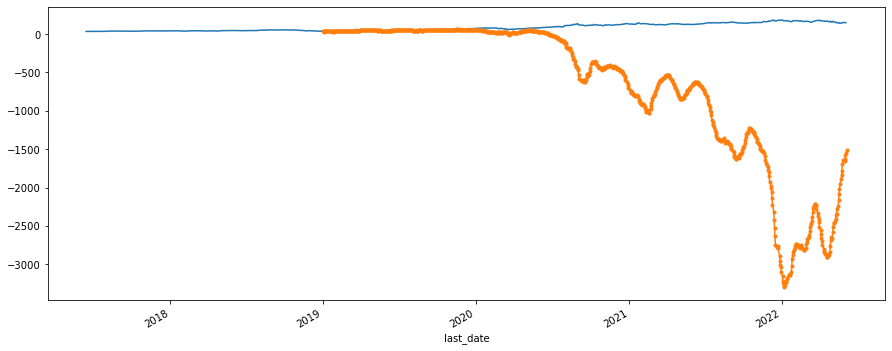

In [29]:
plt.figure(figsize=(15, 6))

y.plot(ax=plt.gca())
y_pred.plot(ax=plt.gca(), legend=None, marker=".")